In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [34]:
df = pd.read_csv("faults.csv")

In [35]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [37]:
df.shape

(1941, 34)

In [38]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


Variable Name: X_Minimum


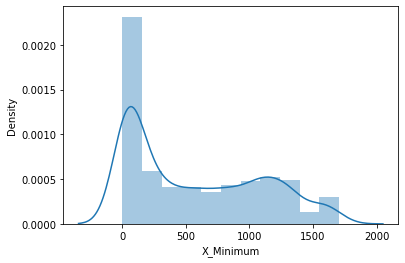

Variable Name: X_Maximum


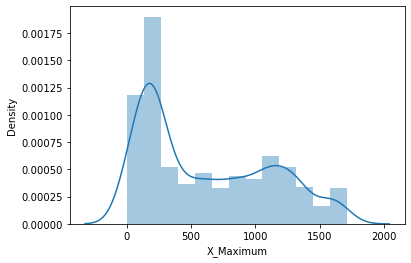

Variable Name: Y_Minimum


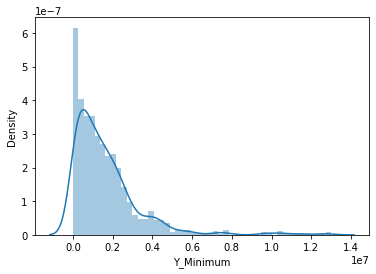

Variable Name: Y_Maximum


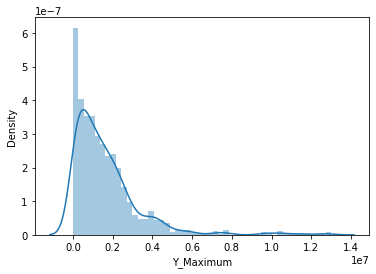

Variable Name: Pixels_Areas


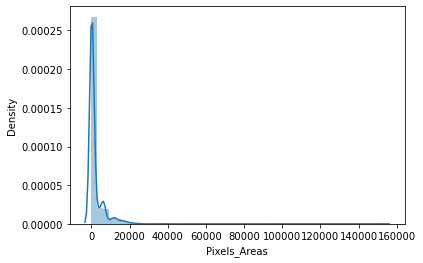

Variable Name: X_Perimeter


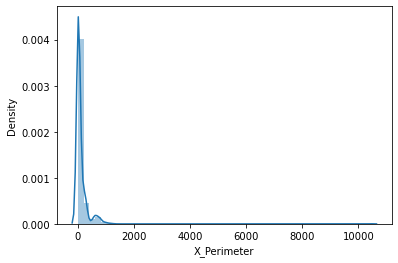

Variable Name: Y_Perimeter


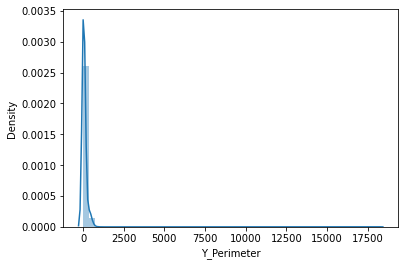

Variable Name: Sum_of_Luminosity


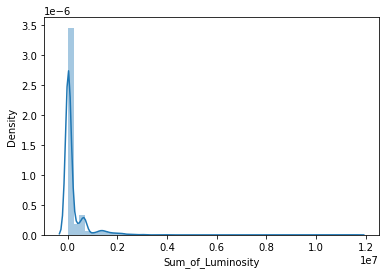

Variable Name: Minimum_of_Luminosity


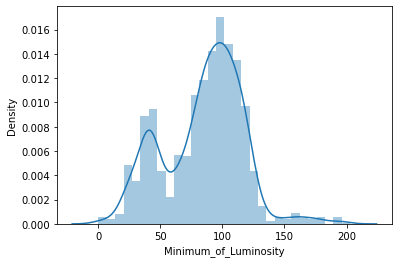

Variable Name: Maximum_of_Luminosity


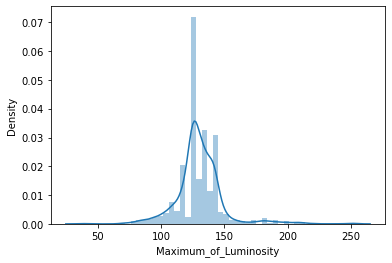

Variable Name: Length_of_Conveyer


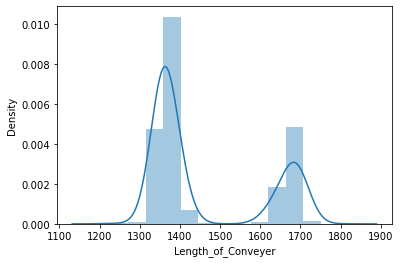

Variable Name: TypeOfSteel_A300


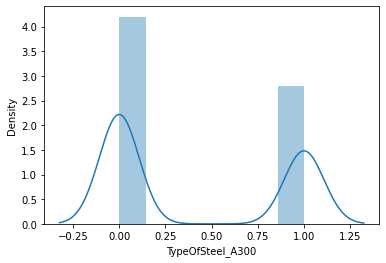

Variable Name: TypeOfSteel_A400


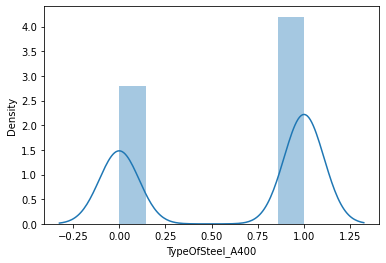

Variable Name: Steel_Plate_Thickness


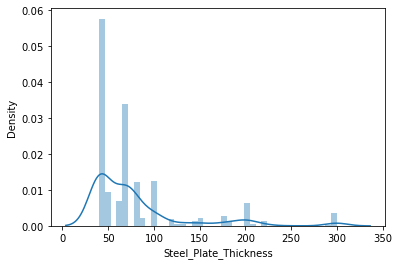

Variable Name: Edges_Index


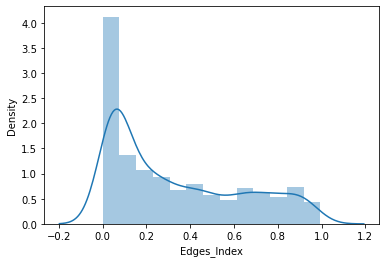

Variable Name: Empty_Index


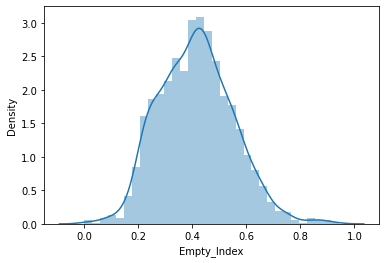

Variable Name: Square_Index


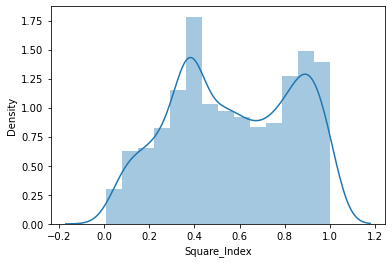

Variable Name: Outside_X_Index


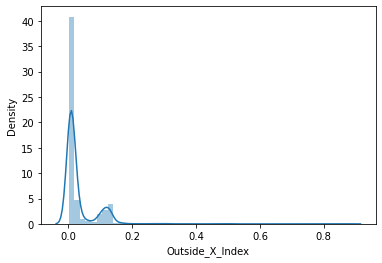

Variable Name: Edges_X_Index


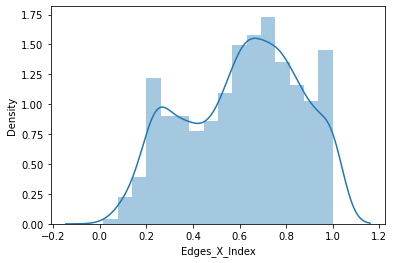

Variable Name: Edges_Y_Index


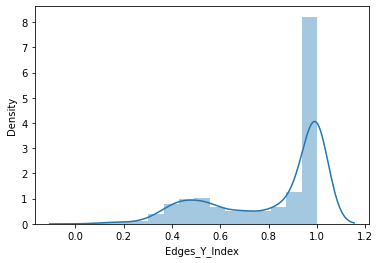

Variable Name: Outside_Global_Index


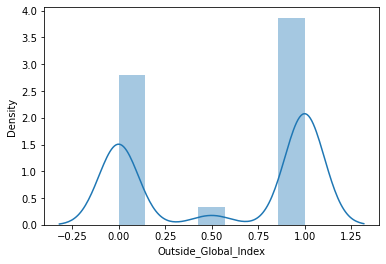

Variable Name: LogOfAreas


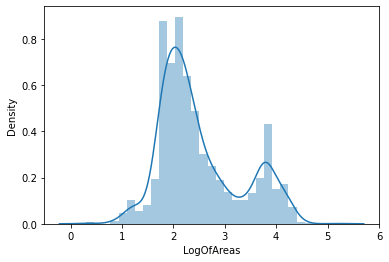

Variable Name: Log_X_Index


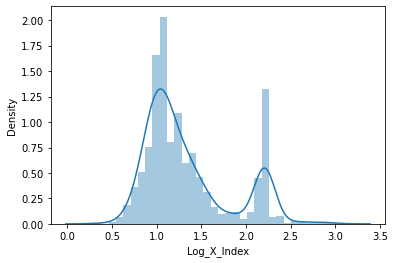

Variable Name: Log_Y_Index


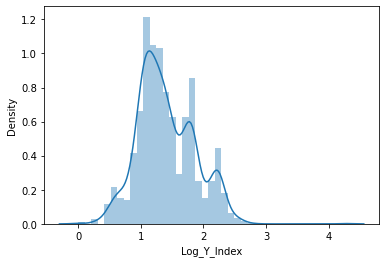

Variable Name: Orientation_Index


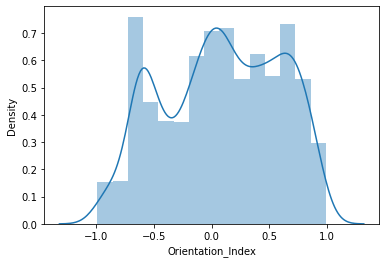

Variable Name: Luminosity_Index


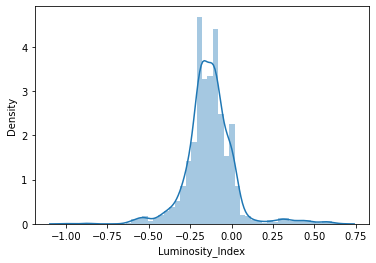

In [40]:
for x in range(0, len(df.columns)-8):
    print("Variable Name:" ,df.columns[x])
    sns.distplot(df.iloc[:,x])
    plt.show()

Variable Name: X_Minimum


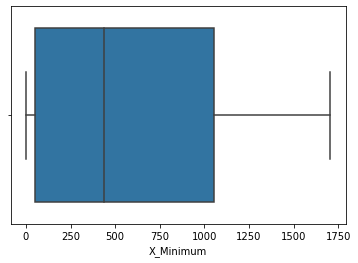

Variable Name: X_Maximum


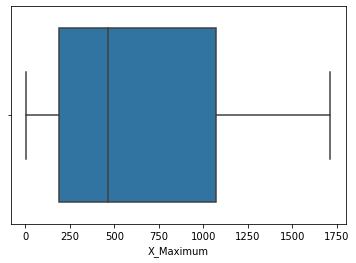

Variable Name: Y_Minimum


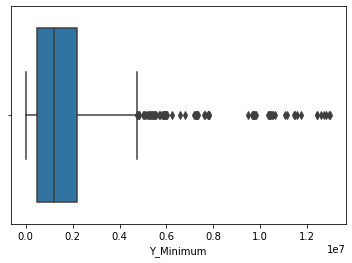

Variable Name: Y_Maximum


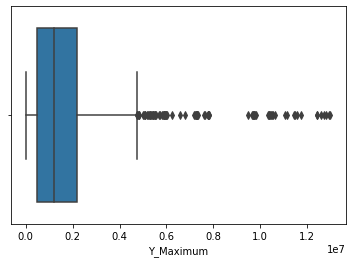

Variable Name: Pixels_Areas


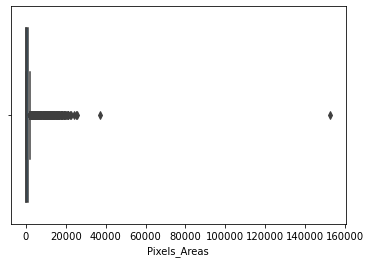

Variable Name: X_Perimeter


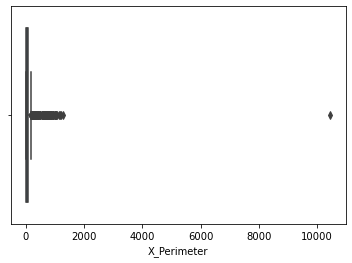

Variable Name: Y_Perimeter


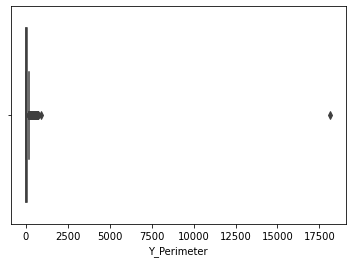

Variable Name: Sum_of_Luminosity


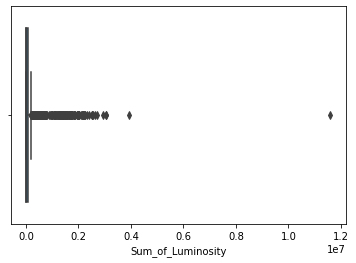

Variable Name: Minimum_of_Luminosity


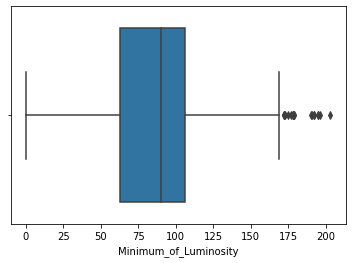

Variable Name: Maximum_of_Luminosity


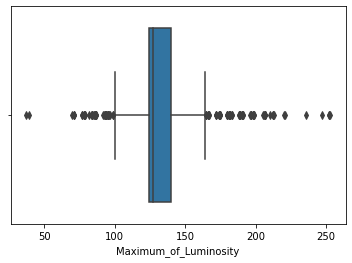

Variable Name: Length_of_Conveyer


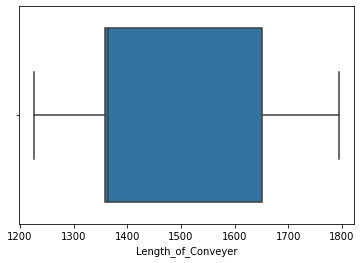

Variable Name: TypeOfSteel_A300


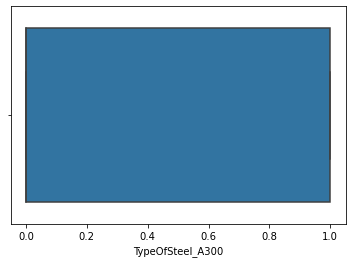

Variable Name: TypeOfSteel_A400


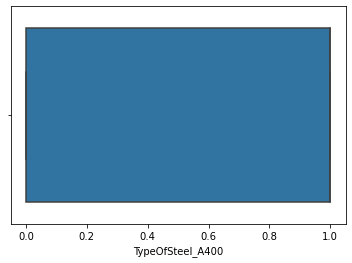

Variable Name: Steel_Plate_Thickness


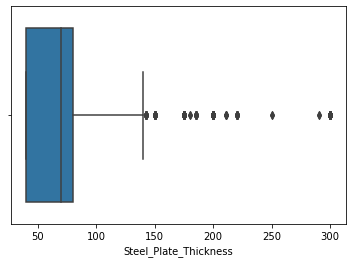

Variable Name: Edges_Index


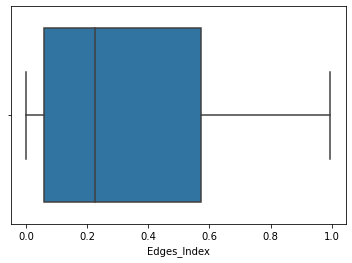

Variable Name: Empty_Index


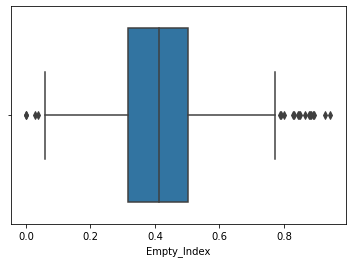

Variable Name: Square_Index


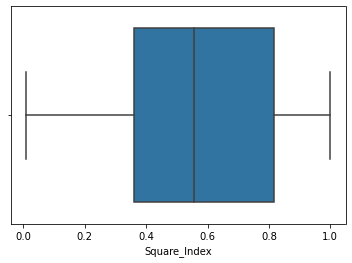

Variable Name: Outside_X_Index


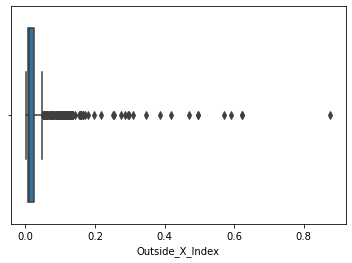

Variable Name: Edges_X_Index


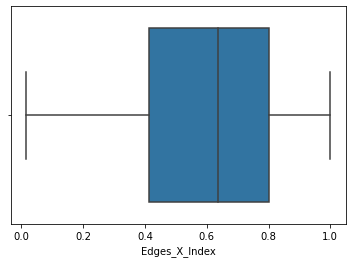

Variable Name: Edges_Y_Index


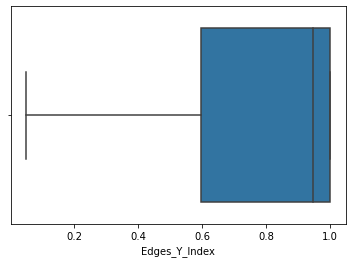

Variable Name: Outside_Global_Index


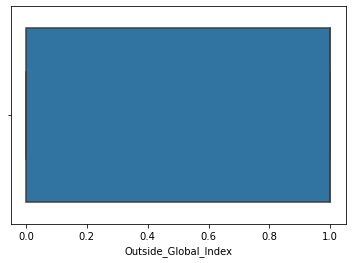

Variable Name: LogOfAreas


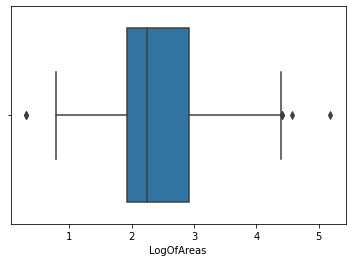

Variable Name: Log_X_Index


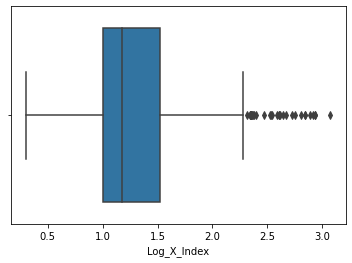

Variable Name: Log_Y_Index


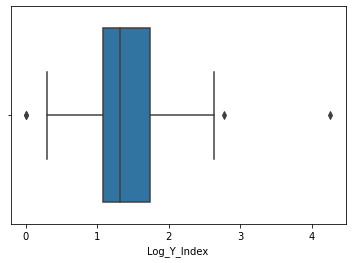

Variable Name: Orientation_Index


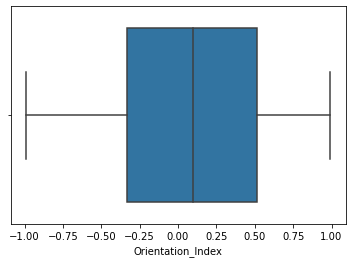

Variable Name: Luminosity_Index


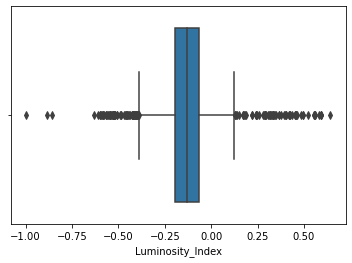

In [41]:
for x in range(0, len(df.columns)-8):
    print("Variable Name:" ,df.columns[x])
    sns.boxplot(df.iloc[:,x])
    plt.show()

<AxesSubplot:xlabel='X_Perimeter', ylabel='Density'>

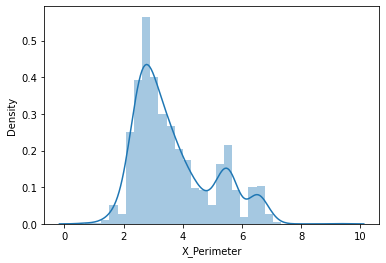

In [42]:
sns.distplot(np.log(df.X_Perimeter))

<AxesSubplot:xlabel='Y_Perimeter', ylabel='Density'>

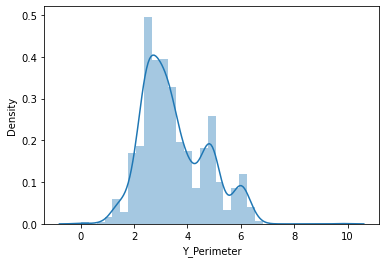

In [43]:
sns.distplot(np.log(df.Y_Perimeter))

<AxesSubplot:xlabel='Sum_of_Luminosity', ylabel='Density'>

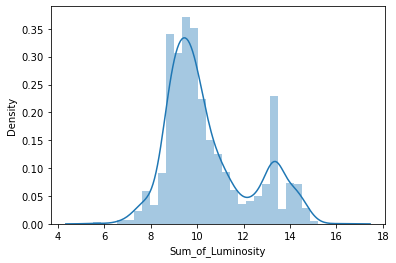

In [44]:
sns.distplot(np.log(df.Sum_of_Luminosity))

In [45]:
df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum()

Pastry          158
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64

In [46]:
target_index = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum().index
target_values = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum().values

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

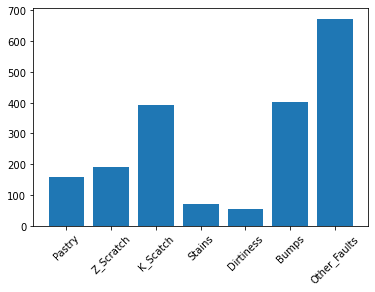

In [47]:
plt.bar(x=target_index, height= target_values)
plt.xticks(rotation=45)

In [48]:
df.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


<AxesSubplot:>

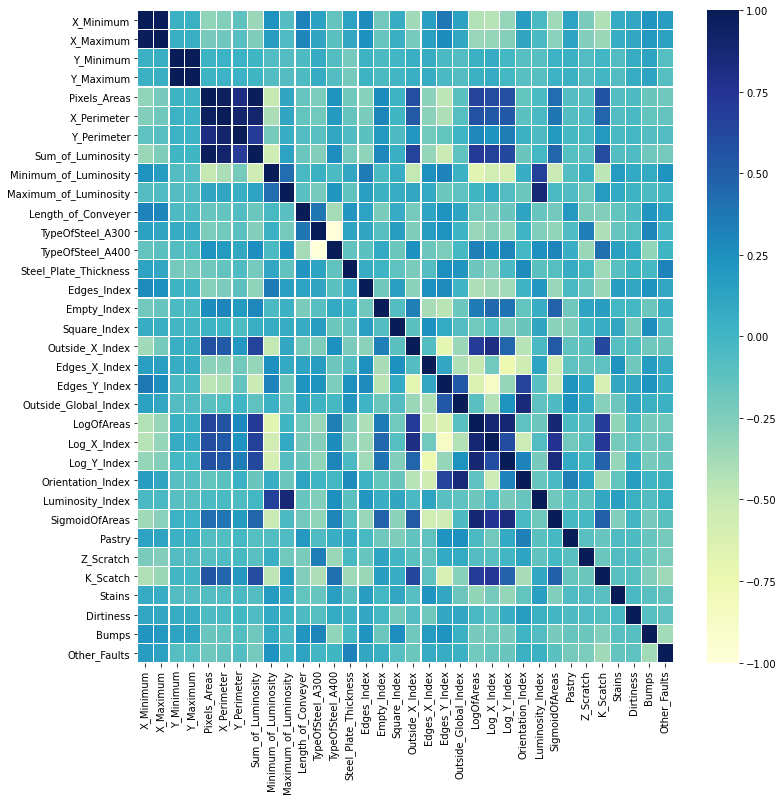

In [49]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths =0.1)

In [50]:
train = pd.read_csv("train.csv")
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,24,38,2563219,2563241,173,22,23,17100,85,111,...,0.6364,0.9565,1.0,2.2380,1.1461,1.3424,0.3636,-0.2278,0.5096,0
1,35,75,2412964,2412966,65,40,3,8355,85,165,...,1.0000,0.6667,0.0,1.8129,1.6021,0.3010,-0.9500,0.0042,0.1852,0
2,165,176,1293999,1294012,106,11,13,11973,96,128,...,1.0000,1.0000,1.0,2.0253,1.0414,1.1139,0.1539,-0.1176,0.2570,1
3,19,57,103914,103916,54,38,2,7498,101,180,...,1.0000,1.0000,0.0,1.7324,1.5798,0.3010,-0.9474,0.0848,0.1812,0
4,41,216,1555596,1555663,6562,255,125,677554,36,125,...,0.6863,0.5360,0.0,3.8170,2.2430,1.8261,-0.6171,-0.1933,1.0000,0


<AxesSubplot:xlabel='Faults', ylabel='count'>

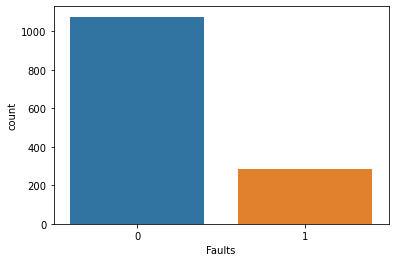

In [51]:
sns.countplot(x="Faults", data= train)

In [52]:
train.Faults.value_counts()

0    1075
1     283
Name: Faults, dtype: int64

In [53]:
df_majority = train[train.Faults==0]
df_minority = train[train.Faults==1]
 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=1075,   
                                 random_state=2) 
 

train = pd.concat([df_majority, df_minority_upsampled])
 

train.Faults.value_counts()



0    1075
1    1075
Name: Faults, dtype: int64

In [54]:
train.drop("TypeOfSteel_A400", axis=1, inplace=True)

In [55]:
train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
count,2150.000000,2150.000000,2.150000e+03,2.150000e+03,2150.000000,2150.000000,2150.000000,2.150000e+03,2150.000000,2150.000000,...,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,675.326977,710.172558,1.816797e+06,1.816841e+06,1281.983256,81.064186,63.172558,1.387547e+05,86.507907,129.115349,...,0.641438,0.860852,0.622791,2.355365,1.255468,1.333236,0.109773,-0.140704,0.523906,0.500000
std,512.135862,494.077647,1.772472e+06,1.772482e+06,4565.892012,273.477740,402.447298,4.391917e+05,27.986779,15.990973,...,0.225171,0.208631,0.469935,0.678691,0.409434,0.399354,0.444181,0.132930,0.317755,0.500116
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.105000,0.000000,0.301000,0.301000,0.000000,-0.973900,-0.998900,0.119000,0.000000
25%,137.250000,213.000000,5.829452e+05,5.830842e+05,83.000000,14.000000,13.000000,9.248500e+03,75.000000,124.000000,...,0.500000,0.787900,0.000000,1.919100,1.000000,1.079200,-0.166700,-0.201900,0.243200,0.000000
50%,681.000000,713.000000,1.347971e+06,1.347995e+06,141.500000,21.000000,19.500000,1.573800e+04,90.000000,127.000000,...,0.666700,1.000000,1.000000,2.150750,1.113900,1.255300,0.117700,-0.144500,0.413800,0.500000
75%,1097.000000,1124.000000,2.531688e+06,2.531711e+06,349.750000,46.000000,41.750000,3.716675e+04,104.000000,135.000000,...,0.800000,1.000000,1.000000,2.543775,1.380200,1.531500,0.454500,-0.082350,0.892050,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000


In [56]:
train.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
X_Minimum,1.000000,0.991353,0.068767,0.068753,-0.274447,-0.230667,-0.109079,-0.310170,0.183321,-0.152911,...,0.135226,0.335201,0.117176,-0.405461,-0.412360,-0.306549,0.155161,-0.104155,-0.335620,0.296283
X_Maximum,0.991353,1.000000,0.072560,0.072548,-0.206926,-0.171132,-0.085086,-0.232329,0.131247,-0.144813,...,0.124953,0.254649,0.081773,-0.324126,-0.316014,-0.253392,0.106086,-0.108201,-0.279294,0.271489
Y_Minimum,0.068767,0.072560,1.000000,1.000000,-0.000619,0.007498,0.018540,-0.011452,-0.037054,-0.075654,...,0.046856,0.007187,-0.008507,0.015372,0.026370,-0.009188,-0.034352,-0.090320,0.006009,0.156940
Y_Maximum,0.068753,0.072548,1.000000,1.000000,-0.000448,0.007690,0.018759,-0.011311,-0.037082,-0.075643,...,0.046826,0.007181,-0.008500,0.015413,0.026395,-0.009129,-0.034336,-0.090331,0.006034,0.156926
Pixels_Areas,-0.274447,-0.206926,-0.000619,-0.000448,1.000000,0.970484,0.852670,0.978169,-0.436188,0.112674,...,-0.282286,-0.419916,-0.081608,0.613560,0.565373,0.557291,-0.100962,-0.028981,0.385198,-0.229019
X_Perimeter,-0.230667,-0.171132,0.007498,0.007690,0.970484,1.000000,0.926914,0.916717,-0.345046,0.111787,...,-0.278660,-0.373533,-0.062238,0.529501,0.491126,0.503669,-0.074329,-0.018936,0.346335,-0.196400
Y_Perimeter,-0.109079,-0.085086,0.018540,0.018759,0.852670,0.926914,1.000000,0.734014,-0.190634,0.066396,...,-0.181322,-0.124978,0.012194,0.283694,0.219482,0.336864,0.037504,-0.041994,0.176914,-0.099689
Sum_of_Luminosity,-0.310170,-0.232329,-0.011452,-0.011311,0.978169,0.916717,0.734014,1.000000,-0.482753,0.138936,...,-0.317705,-0.494875,-0.094195,0.685758,0.641503,0.604523,-0.124493,0.001103,0.432955,-0.258055
Minimum_of_Luminosity,0.183321,0.131247,-0.037054,-0.037082,-0.436188,-0.345046,-0.190634,-0.482753,1.000000,0.443564,...,0.192078,0.219783,-0.017676,-0.618902,-0.496470,-0.534699,0.006098,0.698280,-0.446833,0.099505
Maximum_of_Luminosity,-0.152911,-0.144813,-0.075654,-0.075643,0.112674,0.111787,0.066396,0.138936,0.443564,1.000000,...,0.050772,-0.196832,-0.128518,0.033389,0.119565,-0.037505,-0.180359,0.862282,0.000163,-0.092050


# KNN Algo



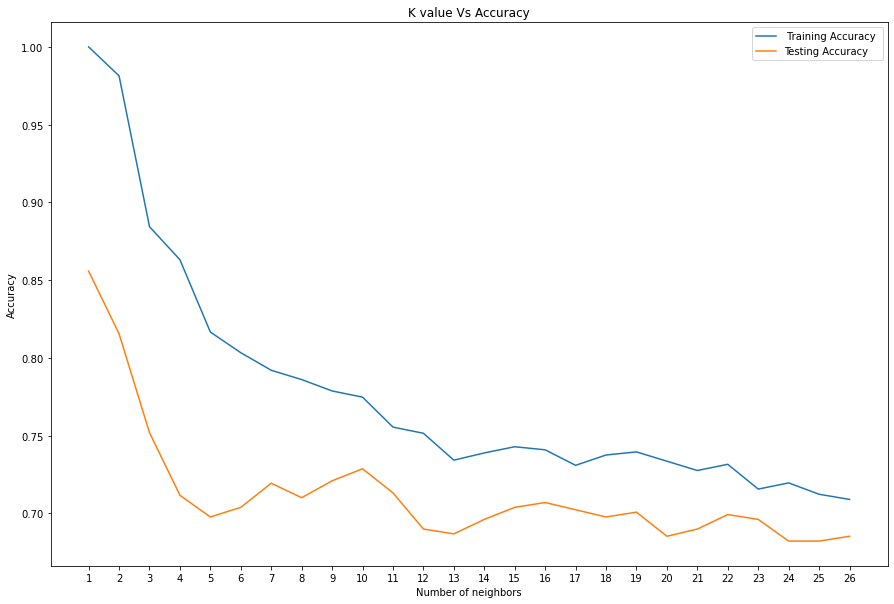

Best accuracy is 0.8558139534883721 with K = 1


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x,y = train.loc[:, train.columns != "Faults"], train['Faults']
x_train,x_test, y_train, y_test = train_test_split(x, y,stratify= y, test_size=0.3, random_state= 2, shuffle= True)
train_accuracy = []
test_accuracy = []

for k in range(1,27):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(range(1,27), train_accuracy, label= " Training Accuracy ")
plt.plot(range(1,27), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(range(1,27))
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

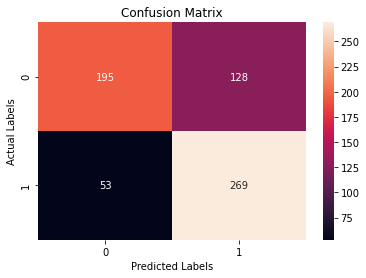

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.60      0.68       323
           1       0.68      0.84      0.75       322

    accuracy                           0.72       645
   macro avg       0.73      0.72      0.72       645
weighted avg       0.73      0.72      0.72       645



In [58]:
knn = KNeighborsClassifier(n_neighbors=7)
y_pred= knn.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

# Randomforest


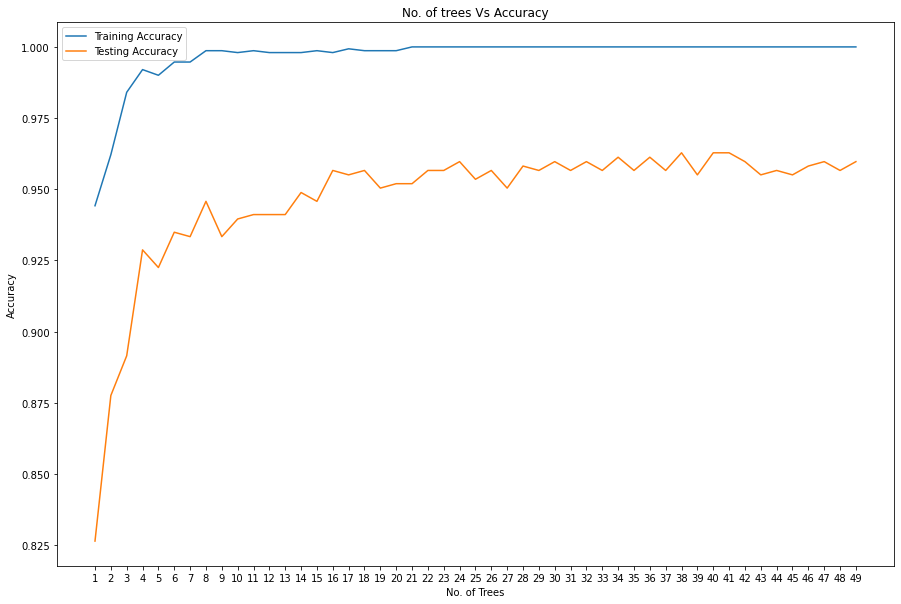

Best Accuracy is 0.9627906976744186 with No. of Trees 38


In [59]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y,stratify= y, test_size= 0.3, random_state= 2, shuffle= True)
train_accuracy= []
test_accuracy= []

for t in range(1, 50):
    rf= RandomForestClassifier(random_state =2, n_estimators= t, min_samples_split= 2)
    rf.fit(x_train, y_train)
    train_accuracy.append(rf.score(x_train, y_train))
    test_accuracy.append(rf.score(x_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(range(1, 50), train_accuracy, label= "Training Accuracy")
plt.plot(range(1,50), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.title("No. of trees Vs Accuracy")
plt.xlabel("No. of Trees")
plt.ylabel("Accuracy")
plt.xticks(range(1,50))
plt.show()

print("Best Accuracy is {} with No. of Trees {}".format(np.max(test_accuracy), 1+ test_accuracy.index(np.max(test_accuracy))))

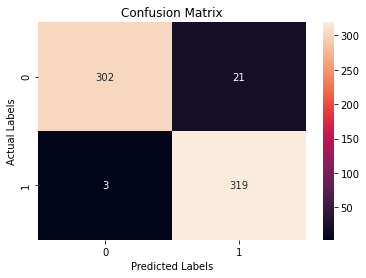

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       323
           1       0.94      0.99      0.96       322

    accuracy                           0.96       645
   macro avg       0.96      0.96      0.96       645
weighted avg       0.96      0.96      0.96       645



In [60]:
rf= RandomForestClassifier(random_state= 2, n_estimators= 38, min_samples_split=2)
y_pred= rf.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

# Decision tree

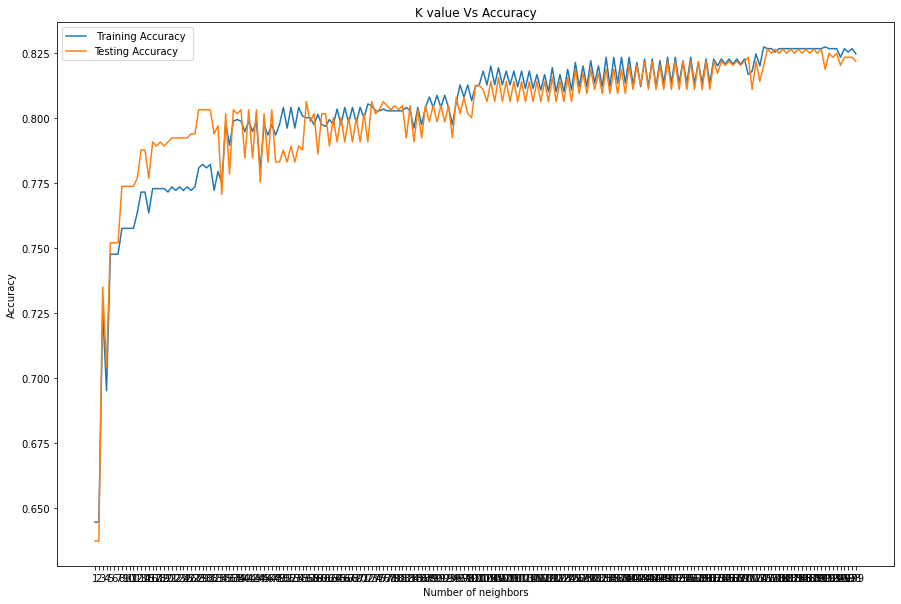

Best accuracy is 0.8263565891472868 with K = 176


In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

train_accuracy=[]
test_accuracy= []

for k in range(1,200):
    #n_estimators is the number of models to iteratively train
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=k)
    bdt.fit(x_train.values, y_train.values)
    test_accuracy.append(bdt.score(x_test.values, y_test.values))
    train_accuracy.append(bdt.score(x_train, y_train))


plt.figure(figsize= [15,10])
plt.plot(range(1,200), train_accuracy, label= " Training Accuracy ")
plt.plot(range(1,200), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(range(1,200))
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

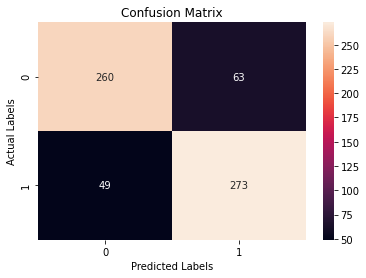

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       323
           1       0.81      0.85      0.83       322

    accuracy                           0.83       645
   macro avg       0.83      0.83      0.83       645
weighted avg       0.83      0.83      0.83       645



In [62]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=176)
y_pred= bdt.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

In [63]:
test= pd.read_csv("test.csv")
test.drop("TypeOfSteel_A400", axis=1, inplace=True)
test.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,696,706,762234,762239,26,13,7,3330,120,140,...,0.0074,0.7692,0.7143,0.0,1.4150,1.0000,0.6990,-0.5000,0.0006,0.1569
1,99,129,2634035,2634039,75,30,7,9556,104,149,...,0.0218,1.0000,0.5714,0.0,1.8751,1.4771,0.6021,-0.8667,-0.0046,0.2288
2,297,302,1028213,1028219,16,5,6,1990,120,132,...,0.0037,1.0000,1.0000,1.0,1.2041,0.6990,0.7782,0.1667,-0.0283,0.1400
3,0,225,344016,344225,25473,992,578,3061597,23,148,...,0.1607,0.2268,0.3616,0.0,4.4061,2.3522,2.3201,-0.0711,-0.0610,1.0000
4,1587,1602,211409,211458,323,51,53,33607,88,119,...,0.0089,0.2941,0.9245,1.0,2.5092,1.1761,1.6902,0.6939,-0.1871,0.9471


In [64]:
rf= RandomForestClassifier(random_state= 2, n_estimators= 26, min_samples_split=2)
rf.fit(x, y)
pred= rf.predict(test)
df= pd.DataFrame({"Faults":pred})
df.to_csv("result.csv", index=False)